<center>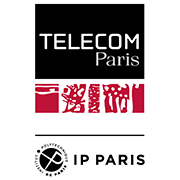</center>

------------------------

<br />

<h1><center><strong><font color="chillipepper"> BGDIA 701 : Statistiques </font></strong></center></h1>
<h3><center><font color="red"><strong> Master BGD </strong></font></center></h3>
<h3><center><font color="red"><strong> Rapport </strong></font></center></h3>

<center>
<h3>MAHAMAT ATTEÏB Adoum </h3>
<br/>
</center>

<br />

------------------------


























In [1]:
# Import des Librairies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import cross_val_score #calcul du R² RIDGE
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.api import OLS, add_constant
import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignorer les avertissements de convergence
warnings.simplefilter('ignore', category=ConvergenceWarning)
from sklearn import linear_model    
import matplotlib.pyplot as plt 
from scipy.stats import ttest_1samp
import scipy.stats as stats
from scipy.stats import norm, t
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import random 
import numpy as np

## Question 1

On pose les hypothèses du test : hypothéses nulles et alternatives \
$$ H_0 :  \mu = \mu' $$\
$$ H_1 : \mu \ne \mu' $$

In [2]:
def hypothesis_test(n, mu_0, alpha):
    
    # On génére les échantillons des lois normales
    sample = np.random.normal(mu_0, 1, n)
    sample_mean = np.mean(sample)       # moyenne 
    sample_std = np.std(sample, ddof=1) # ecart-type
    
    # echantillon de petite taille : on utilise le test z pour de grands échantillons
    if n > 20:
        # Echantillin de grande taille : loi normale
        # calcul de la z-statistique
        z = (sample_mean - mu_0) /(sample_std / np.sqrt(n))
        # calcul de la p-value
        p_value = 2 * norm.sf(abs(z))
        # détermination de la zone de rejet
        z_critical = norm.ppf(1 - alpha/2)
        rejection_region = (-z_critical, z_critical)
        
    else:
        # Echantillin de petite taille : loi de student
        # calcul de la t-statistique et de la p-value 
        t_stat, p_value = ttest_1samp(sample, mu_0)
        # détermination de la zone de rejet 
        t_critical = t.ppf(1 - alpha/2, df=n-1)
        rejection_region = [-t_critical, t_critical]
        z = t_stat
    
    # Décision
    decision = 'On rejete H0' if p_value < alpha else 'On ne rejete pas H0'
    
    # Résultats
    print(f"La statistique : {z}")
    print(f"La zone de rejet: {rejection_region}")
    print(f"La p-value: {p_value}")
    print(f"Décision du test: {decision}\n")

    return z, rejection_region, p_value, decision

Si l'échantillon est de petite taille (n < 20), on utilise la distribution de student pour calculer la statistique, la p-value et déterminer la zone de rejet.
\
S'il est de grande taille (n > 20), c'est la distribution gaussienne qui est plus adaptée pour calculer la statistique, la p-value et déterminer la zone de rejet.

La p-value est une probabilité qu'on compare à notre seuil $\alpha $ pour décider de l'acceptation ou du rejet de nos hypothèses.\
Si la $p-value < \alpha $, on rejette l'hypothèse nulle et on accepte l'hypothèse alternative H1.
Par contre, si elle est supérieure à $\alpha $, on accepte H0 et on rejette H1.

### test avec des échantillons de petite taille (n = 20)

In [3]:
# Paramètres
mu_0, alpha, n_small = 0, 0.05, 20
# On appelle la fonction "hypothesis_test"
np.random.seed()
results_small = [hypothesis_test(n_small, mu_0, alpha) for _ in range(3)]

La statistique : -0.11963714603472893
La zone de rejet: [-2.093024054408263, 2.093024054408263]
La p-value: 0.9060265578528406
Décision du test: On ne rejete pas H0

La statistique : -0.18348835124554194
La zone de rejet: [-2.093024054408263, 2.093024054408263]
La p-value: 0.8563588198245071
Décision du test: On ne rejete pas H0

La statistique : 0.054253617467368814
La zone de rejet: [-2.093024054408263, 2.093024054408263]
La p-value: 0.957299517754198
Décision du test: On ne rejete pas H0



### test avec des échantillons de grande taille (n=100)

In [40]:
mu_0, alpha, n_large = 0, 0.05, 100
results_large = [hypothesis_test(n_large, mu_0, alpha) for _ in range(3)]

La statistique : 0.13749586532051136
La zone de rejet: (-1.959963984540054, 1.959963984540054)
La p-value: 0.8906388607038306
Décision du test: On ne rejete pas H0

La statistique : -1.5737031169817812
La zone de rejet: (-1.959963984540054, 1.959963984540054)
La p-value: 0.11555610090355445
Décision du test: On ne rejete pas H0

La statistique : 0.952243480668749
La zone de rejet: (-1.959963984540054, 1.959963984540054)
La p-value: 0.3409735143401841
Décision du test: On ne rejete pas H0



## Question 2

On importe les données "data_dm3.csv" et on réalise une régression linéaire.

In [5]:
# Import des données 
data = pd.read_csv("data_dm3.csv", header=None)
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,-1.298173,-0.162249,1.223379,1.355554,1.080171,0.634979,0.298741,0.548270,0.731773,1.018645,...,0.588278,0.210106,1.861458,-0.436399,0.279299,-1.416020,-2.332363,0.215096,-0.693319,151.0
1,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,...,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993,75.0
2,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,...,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588,141.0
3,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,...,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662,206.0
4,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,...,0.786157,-1.058179,-0.155788,-0.642504,2.040010,-1.703110,-1.901502,1.778811,-0.489853,135.0


In [6]:
print("La base de donnée a", data.shape[0],"observations et", data.shape[1], "variables.")

La base de donnée a 442 observations et 211 variables.


In [7]:
# Variable TARGET : dernière colonne de la data
y = data.iloc[:,-1]

# Variables explicatives : toutes les colonnes sauf la dernière (200 en tout)
X = data.iloc[:, :-1]

On subdivise la base de donnéé en 2. Les bases de données train et test représentent respectivement 80 et 20%. Le modèle sera implementé sur la base train et le test permettra de mesurer la performance du modèle. 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Quand on effectue une régression linéaire, c'est le coefficient de détermination R² qui nous permet d'évaluer la qualité du modèle. Il correpond en fait au carré du coefficient de corrélation. 
Le modèle est de bonne qualité si le R² s'approche de 1 et est de mauvaise qualité s'il est proche de 0.

In [9]:
# instanciation du modele
model = LinearRegression()

# modele
model.fit(X_train, y_train)

# prediction du modèle
y_pred = model.predict(X_test)

# Calcul du coefficient de détermination 
r_squared = r2_score(y_test, y_pred)
print("Le coefficient de détermination est égal à", round(r_squared, 2))

# Calcul Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("L'erreur quadratique moyenne vaut", round(mse, 2))

Le coefficient de détermination est égal à 0.24
L'erreur quadratique moyenne vaut 4007.17


Ce modèle est de piètre qualité car le R² est faible. Cela signifie que les 210 variables indépendantes intégrées dans le modèle ne permettent pas de prédire avec pertinence la variable target.
Le R² etant très faible, nous obtenons naturellement une grande erreur quadratique.

## Question 3 : algorithme

### a) On implémente un algorithme de sélection de variables

L'algorithme de sélection de variables effectue une regression linéaire entre la variable target y et chacune des variables explicatives.

In [10]:
def forward_selection(X, y, significance_level=0.1):
    remaining = set(X.columns)
    selected = []
    selected_pvalues = []
    
    while remaining:
        best_pval = 1.0
        best_candidate = None
        
        for candidate in remaining:
            model = OLS(y, add_constant(X[[candidate]])).fit()
            p_value = model.pvalues[candidate]
            
            if p_value < best_pval:
                best_pval = p_value
                best_candidate = candidate
                
        if best_pval < significance_level:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            selected_pvalues.append(best_pval)

            model = OLS(y, add_constant(X[selected])).fit()
            y = y - model.predict(add_constant(X[selected]))
        else:
            break
    
    # Création d'un DataFrame avec les résultats
    selected_df = pd.DataFrame({
        'selected': selected,
        'selected_pvalues': selected_pvalues
    })
    return selected_df

### b) On exécute l'algorithme implémenté à la question a)

L'algorithme 'Forward Variable Selection' nous permettra de sélectionner 11 variables.

In [11]:
# Selectionner les variables en utilisant l'algorithme
selected_variables = forward_selection(X, y)

# Affichage des résultats
print(selected_variables)

    selected  selected_pvalues
0         58      3.466006e-42
1        123      2.946030e-16
2        167      2.591195e-04
3        129      4.746756e-03
4        174      4.502439e-03
5        135      6.122357e-04
6         13      1.726528e-02
7        208      2.333541e-02
8        112      5.106216e-02
9        183      5.517629e-02
10       204      6.513011e-02


Toutes les p-values des variables sélectionnées sont inférieures à 0.05.

In [12]:
list_var_select = selected_variables.iloc[:, 0].tolist()
print("Liste de variables sélectionnées :", list_var_select)

Liste de variables sélectionnées : [58, 123, 167, 129, 174, 135, 13, 208, 112, 183, 204]


### c) On effectue une rég. linéaire avec les variable sélectionnées en b)

On effectue une régression linéaire en utilisant comme variables indépendantes les 11 variables sélectionnées par l'algorithme Forward.

In [13]:
# Fit the final model with the selected variables
if list_var_select:
    X_final = sm.add_constant(X_train[list_var_select])
    final_model = OLS(y_train, X_final).fit()
else:
    final_model = None

if final_model is not None:
    # Print the summary of the final model
    print(final_model.summary())
else:
    print("No variables were selected by the forward selection process.")

                            OLS Regression Results                            
Dep. Variable:                    210   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     36.40
Date:                Fri, 24 Nov 2023   Prob (F-statistic):           4.43e-51
Time:                        22:43:29   Log-Likelihood:                -1901.5
No. Observations:                 353   AIC:                             3827.
Df Residuals:                     341   BIC:                             3873.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.8298      2.867     52.955      0.0

La régression linéaire effectuée avec 11 variables explicatives à un coefficient de détermination de 0.54 plus élevé que celle effectuée avec l'ensemble des variables explicatives qui étaient de 0.24. On constate une nette amélioration du modèle.

Dans la suite, on introduit la regression linéaire regularisée (Lasso, Ridge et Elastic Net) qui permet de gérer la multicolinéarité et d'éviter le sur-ajustement (overfiting).

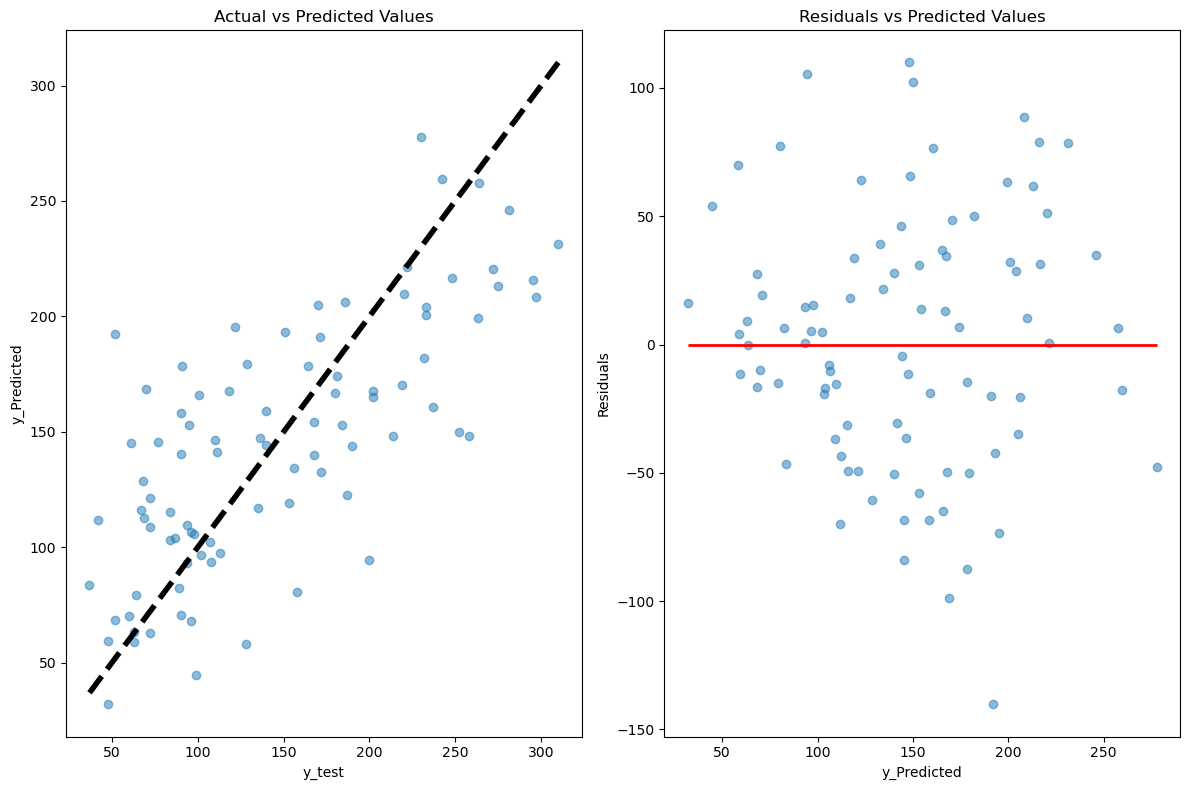

In [48]:
# Supposons que final_model et list_var_select sont déjà définis et prêts à être utilisés
if final_model is not None:
    # Faire les prédictions en utilisant X_test[list_var_select]
    y_pred = final_model.predict(sm.add_constant(X_test[list_var_select]))

    # Créer une figure pour les deux graphiques
    plt.figure(figsize=(12, 8))

    # Premier graphique : Valeurs réelles vs Prédictions
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    plt.xlabel('y_test')
    plt.ylabel('y_Predicted')
    plt.title('Actual vs Predicted Values')

    # Deuxième graphique : Résidus vs Valeurs Prédites
    plt.subplot(1, 2, 2)
    plt.scatter(y_pred, y_test - y_pred, alpha=0.5)
    plt.hlines(0, y_pred.min(), y_pred.max(), colors='red', lw=2)
    plt.xlabel('y_Predicted')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Predicted Values')

    # Ajustement de la disposition et affichage des graphiques
    plt.tight_layout()
    plt.show()


Dans le premier graphique, on constate qu'il y a plusieurs points qui sont très proche de la droite de regression. Dans le second, on constate la moyenne des résidus est presque nulle.

## Question 4 : Ridge sans la cross-validation

Ici, on s'intéresse à la régression linéaire régularisée RIDGE qui utilise la regularisation L2 pour la pénalité. 

$$ \sum_{i=1}^{n} (y_i - X_i \beta)^2 + \alpha \|\beta\|^2 $$

$\alpha$ est le paramétre de pénalité.

On implémente une fonction qui nous servira à exécuter les 3 modèles linéaires régularisé (Ridge, Lasso et Elastic Net). 

In [15]:
def run_regression_analysis(X_train, y_train, X_test, y_test, model_type, alphas, n_iterations):
    # Initialisation 
    coefs = []
    r_squared = []
    train_errors = []
    test_errors = []

    for alpha in alphas:
        # Création du modèle
        model = model_type(alpha=alpha, max_iter=30000)
        model.fit(X_train, y_train)

        # Calcul des coefs et du coefficient de détermination R²
        coefs.append(model.coef_)
        r_squared.append(model.score(X_test, y_test))

        # Les métriques 
        train_errors.append(model.score(X_train, y_train))
        test_errors.append(model.score(X_test, y_test))

    # Graphiques
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Subplot for coefficients evolution
    axes[0].plot(alphas, coefs)
    axes[0].set_xscale('log')
    axes[0].set_xlabel('alpha')
    axes[0].set_ylabel('coefficients')
    axes[0].set_title('Coefficients Evolution')

    # Subplot for R-squared evolution
    axes[1].plot(alphas, test_errors)
    axes[1].set_xscale('log')
    axes[1].set_xlabel('alpha')
    axes[1].set_ylabel('R-squared')
    axes[1].set_title('R-squared Evolution')

    plt.tight_layout()
    plt.show()

    return coefs, r_squared, train_errors, test_errors

On utilise la fonction "run_regression_analysis". Le modèle type utilisé est le "RIDGE".

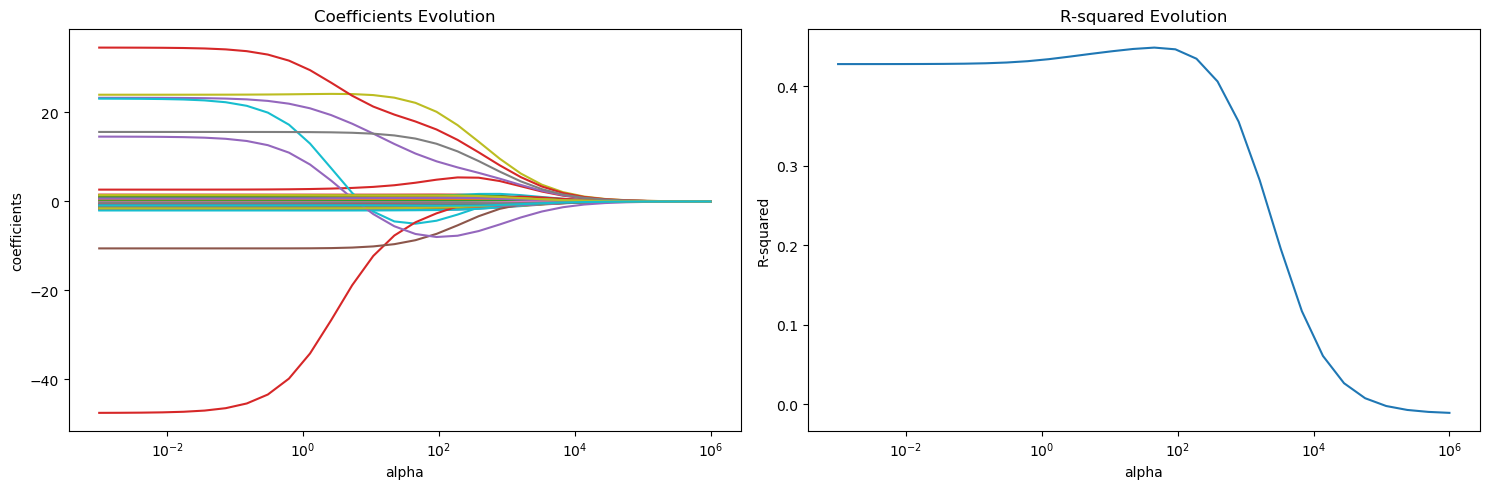

In [16]:
alphas = np.logspace(-3, 6, 30)  #30 itérations
coefs, r_squared, ridge_train_errors, ridge_test_errors = run_regression_analysis(X_train, y_train, X_test, y_test, Ridge, alphas, 30)

Interprétation du graphique :\
Gauche : \
Quand $\alpha$ s'approche de 0, les coefficients du modèle ont une très grande variance, donc, peu pertinents pour prédire des nouvelles données. On retrouve donc le modèle linéaire classique sans régularisation.\
Quand $\alpha$ devient très très grand (proche de l'infini), tous les coefficients du modèle s'annulent.\
Droite : \
Ce graphique nous montre l'évolution du coefficient de détermination R² suivant les valeurs du paramètre $\alpha$. La valeur optimale de $\alpha$ nous permet d'obtenir le bon R². 

## Question 5 : Ridge avec la cross-validation

Cette fois-ci, on refait la regression linéaire RIDGE avec 10 cross-validation (cv=10).

In [17]:
alphas = np.logspace(-3, 6, 30)  #30 itérations

In [18]:
ridge_cv = RidgeCV(alphas=alphas, cv=10).fit(X_train, y_train)

In [19]:
print("La valeur optimale de alpha est :", round(ridge_cv.alpha_))
ridge_cv_mse_train = round(mean_squared_error(y_train, ridge_cv.predict(X_train)), 2)
ridge_cv_mse_test = round(mean_squared_error(y_test, ridge_cv.predict(X_test)), 2)
print("Le MSE sur les données train du modèle ridge(cv) vaut :", ridge_cv_mse_train )
print("Le MSE sur les données test du modèle ridge(cv) vaut :", ridge_cv_mse_test )

La valeur optimale de alpha est : 92
Le MSE sur les données train du modèle ridge(cv) vaut : 2622.94
Le MSE sur les données test du modèle ridge(cv) vaut : 2933.81


In [20]:
# Calculer le score R2 moyen à partir de la validation croisée
r2_scores_cv = cross_val_score(ridge_cv, X_train, y_train, cv=10, scoring='r2')
print(r2_scores_cv)

[ 0.45184601  0.27448832  0.42675802  0.13349613  0.30345043  0.42963943
  0.55214125  0.3890952  -0.15809157  0.25301781]


In [21]:
# Le score R² moyen pour la meilleure alpha
print("Le R² moyen correspondant à la valeur optimale de alpha est :",round(np.mean(r2_scores_cv),3))

Le R² moyen correspondant à la valeur optimale de alpha est : 0.306


## Question 6 : Lasso (sans la cross-valivation)

Dans cette question, on implémente le modèle linéaire régularisé 'Lasso' qui utilise une pénalité L1 pour réduire les coefficients des variables non pertinentes à zéro. Elle nous permet également de sélectionner les variables qui prédit le mieux notre variable target parmi les 210 variables explicatives dont nous disposons.

$$ \sum_{i=1}^{n} (y_i - X_i \beta)^2 + \alpha \|\beta\|_{1} $$

Cette pénalité L1 encourage la plupart des coefficients à devenir exactement égaux à zéro, ce qui permet une sélection automatique des caractéristiques et contribue à la régularisation du modèle.

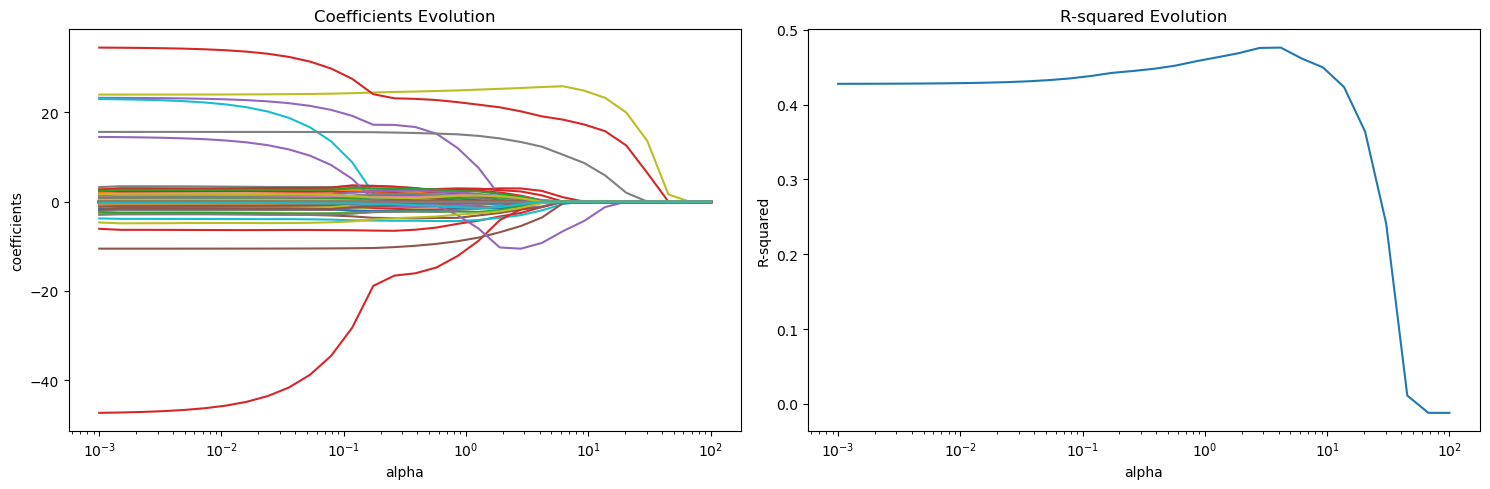

In [22]:
# On reutilise la fonction "run_regression_analysis" implémentée plus haut
alphas = np.logspace(-3, 2, 30)
coefs, r_squared, lasso_train_errors, lasso_test_errors = run_regression_analysis(X_train, y_train, X_test, y_test, Lasso, alphas, 30)

En résumé, les problèmes de convergence de l'algorithme Lasso peuvent être dus à plusieurs facteurs, mais en ajustant les paramètres, en normalisant les caractéristiques et en gérant la multicolinéarité, on peut résoudre ces problèmes et obtenir une convergence stable.

## Question 7 : Lasso (avec validation croisée)

In [23]:
# Modèle Lasso
lasso_cv = LassoCV(alphas=alphas, cv=10).fit(X_train, y_train)

In [24]:
print("La valeur optimale de alpha est", round(lasso_cv.alpha_, 2))

La valeur optimale de alpha est 6.21


In [25]:
# Coefficient de détermination R²
lasso_cv_score_train = lasso_cv.score(X_train, y_train)
lasso_cv_score_test = lasso_cv.score(X_test, y_test)
print("Le coef R² du modèle Lasso sur les données train", round(lasso_cv_score_train, 2))
print("Le coef R² du modèle Lasso sur les données test", round(lasso_cv_score_test, 2))

Le coef R² du modèle Lasso sur les données train 0.49
Le coef R² du modèle Lasso sur les données test 0.46


In [26]:
lasso_cv_mse_train = round(mean_squared_error(y_train, lasso_cv.predict(X_train)), 2)
lasso_cv_mse_test = round(mean_squared_error(y_test, lasso_cv.predict(X_test)), 2)

print("Le MSE du modèle Lasso avec les données train ", lasso_cv_mse_train)
print("Le MSE du modèle Lasso avec les données test", lasso_cv_mse_test)

Le MSE du modèle Lasso avec les données train  3100.87
Le MSE du modèle Lasso avec les données test 2853.05


## Question 8 :  Elasticnet (sans la cross-validation)

Le modlèle linéaire régularisé Elastic Net est un compromis entre le modèle ridge et lasso. Contrairement aux deux derniers modèles, Elastic Net dispose deux hyperparamètres.
$$ \sum_{i=1}^{n} (y_i - X_i \beta)^2 + \alpha_1 \|\beta\|_1 + + \alpha_2 \|\beta\|^2 $$

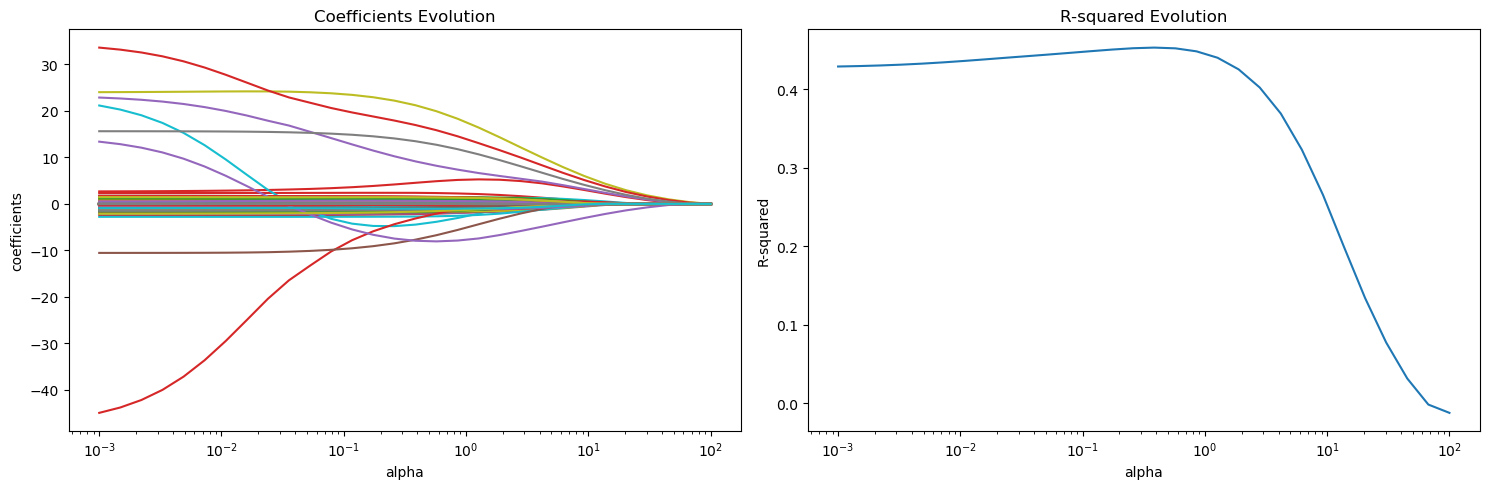

In [27]:
alphas = np.logspace(-3, 2, 30)
# On appelle la fonction "run_regression_analysis"
# Le modèle type sera remplacé par ElasticNet.
coefs, r_squared, elasticnet_train_errors, elasticnet_test_errors = run_regression_analysis(X_train, y_train, X_test, y_test, ElasticNet, alphas, 30)

## Question 9 : Elasticnet (avec la cross-validation)

Ce modèle a deux hyperparamètres qui sont appélés : alphas et l1_ratio

In [28]:
# Instanciation du modèle
elasticnet_cv = ElasticNetCV(alphas=np.logspace(-3, 2, 30), l1_ratio=[.1, .5, .7, .9, .95, .99, 1], cv=10, max_iter=20000)
# Entrainement le modèle sur les données train
elasticnet_cv.fit(X_train, y_train)

ElasticNetCV(alphas=array([1.00000000e-03, 1.48735211e-03, 2.21221629e-03, 3.29034456e-03,
       4.89390092e-03, 7.27895384e-03, 1.08263673e-02, 1.61026203e-02,
       2.39502662e-02, 3.56224789e-02, 5.29831691e-02, 7.88046282e-02,
       1.17210230e-01, 1.74332882e-01, 2.59294380e-01, 3.85662042e-01,
       5.73615251e-01, 8.53167852e-01, 1.26896100e+00, 1.88739182e+00,
       2.80721620e+00, 4.17531894e+00, 6.21016942e+00, 9.23670857e+00,
       1.37382380e+01, 2.04335972e+01, 3.03919538e+01, 4.52035366e+01,
       6.72335754e+01, 1.00000000e+02]),
             cv=10, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
             max_iter=20000)

In [29]:
# Coefficient de détermination
elasticnet_r2_train = elasticnet_cv.score(X_train, y_train)
elasticnet_r2_test = elasticnet_cv.score(X_test, y_test)

print("Le R² du modéle Elastic Net avec cv sur les données train est :", round(elasticnet_r2_train, 4))
print("Le R² du modéle Elastic Net avec cv sur les données test est :", round(elasticnet_r2_test, 4))

Le R² du modéle Elastic Net avec cv sur les données train est : 0.4897
Le R² du modéle Elastic Net avec cv sur les données test est : 0.4615


In [30]:
elasticnet_cv_mse_train = round(mean_squared_error(y_train, elasticnet_cv.predict(X_train)), 2)
elasticnet_cv_mse_test = round(mean_squared_error(y_test, elasticnet_cv.predict(X_test)), 2)

print("Le MSE de Elastic Net avec cv sur les données train est :", round(elasticnet_cv_mse_train, 3))
print("Le MSE de Elastic Net avec cv sur les données test est :", round(elasticnet_cv_mse_test, 3))

Le MSE de Elastic Net avec cv sur les données train est : 3100.87
Le MSE de Elastic Net avec cv sur les données test est : 2853.05


## Question 10

In [31]:
models = ['Ridge', 'Lasso', 'ElasticNet']
mse_train = [ridge_cv_mse_train, lasso_cv_mse_train, elasticnet_cv_mse_train]
mse_test = [ridge_cv_mse_test, lasso_cv_mse_test, elasticnet_cv_mse_test]

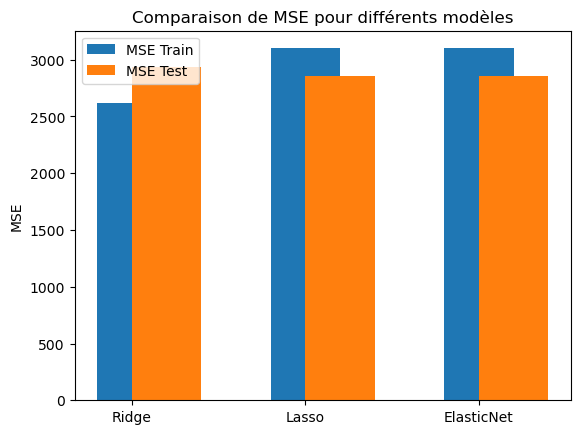

In [32]:
# Création du barplot
x = range(len(models))
plt.bar(x, mse_train, width=0.4, label='MSE Train', align='center')
plt.bar(x, mse_test, width=0.4, label='MSE Test', align='edge')

# Ajout des étiquettes et légendes
#plt.xlabel('Modèles')
plt.ylabel('MSE')
plt.xticks(x, models)
plt.legend()
plt.title('Comparaison de MSE pour différents modèles')
plt.show()

CONCLUSION : 
Dans ce TP, il a été question, dans la première partie, d'implémenter un algorithme de sélection de variables. Cet algorithme nous a permis de retenir 11 variables. Nous avons ensuite réalisé deux régressions linéaire, la première avec l'ensemble des variables explicatives qui a conduit à un coefficient de détermination faible (0.24) et la seconde avec les variables sélectionnées qui a permis d'obtenir un R² de 0.54.\
Enfin, il a été question de réaliser 3 modèles de régression linéaire régularisé (Ridge, Lasso et Elastic Net) avec et sans la cross-validation. On constate que les modèles Lasso et Elastic Net avec la cross-validation présentent les mêmes performances et en plus les erreurs quadratiques moyennes sont plus faibles sur les données test que les données train. Ils prédisent mieux les nouvelles données, autrement dit se généralisent mieux.